In [1]:
# RANDOM FOREST OLD

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Load the data
final_df = pd.read_excel("old.xlsx")

# Extract features and target
X = final_df.drop(['result'], axis=1)
y = final_df['result']

# Replace inf and negative values in 'cur_run_rate' with zeros
X['cur_run_rate'] = X['cur_run_rate'].apply(lambda x: 0 if x <= 0 or np.isinf(x) else x)

# Encode categorical variables
label_encoders = {}
categorical_columns = ['Batting_team', 'Bowling_team', 'city']

for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    X[col] = label_encoders[col].fit_transform(X[col])

# Split the data into training (70%), validation (15%), and testing (15%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=45)
X_validate, X_test, y_validate, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=45)

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [200],
    'max_depth': [10],
    'min_samples_split': [2],
    'min_samples_leaf': [2]
}

# Create and train the RandomForestClassifier with GridSearchCV
clf = RandomForestClassifier(random_state=45)
grid_search = GridSearchCV(clf, param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Make predictions on the validation set using the best model
best_clf = grid_search.best_estimator_
validate_pred = best_clf.predict(X_validate)

# Calculate and print the validation accuracy
accuracy_validate = accuracy_score(y_validate, validate_pred)
print("Validation Accuracy:", accuracy_validate)

# You can also print a classification report for more detailed performance metrics
print("Validation Classification Report:")
print(classification_report(y_validate, validate_pred))

# Make predictions on the test set using the best model
test_pred = best_clf.predict(X_test)

# Calculate and print the test accuracy
accuracy_test = accuracy_score(y_test, test_pred)
print("Test Accuracy:", accuracy_test)

# You can also print a classification report for more detailed performance metrics
print("Test Classification Report:")
print(classification_report(y_test, test_pred))


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Validation Accuracy: 0.9138599714227393
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      7104
           1       0.91      0.93      0.92      7593

    accuracy                           0.91     14697
   macro avg       0.91      0.91      0.91     14697
weighted avg       0.91      0.91      0.91     14697
Test Accuracy: 0.9118927745271466
Test Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.90      0.91      6962
           1       0.91      0.92      0.92      7736

    accuracy                           0.91     14698
   macro avg       0.91      0.91      0.91     14698
weighted avg       0.91      0.91      0.91     14698


In [3]:
# RANDOM FOREST NEW

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Validation Accuracy: 0.899231135605906
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.88      0.89      7104
           1       0.89      0.92      0.90      7593

    accuracy                           0.90     14697
   macro avg       0.90      0.90      0.90     14697
weighted avg       0.90      0.90      0.90     14697

Validation Confusion Matrix:
[[6266  838]
 [ 643 6950]]


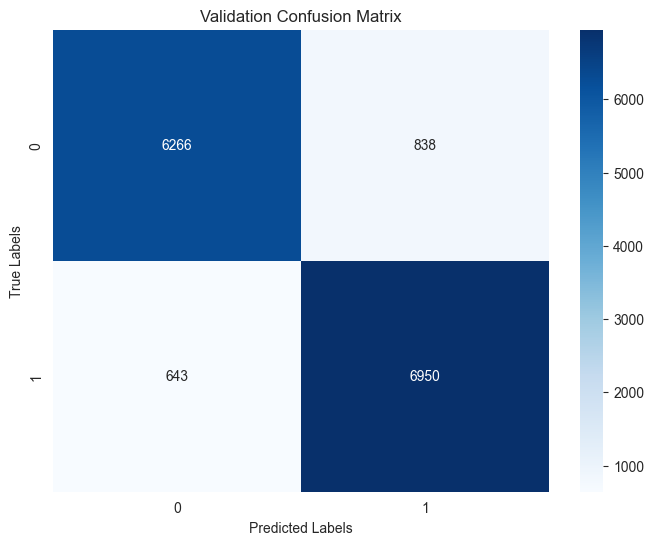

Test Accuracy: 0.896652605796707
Test Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.89      0.89      6962
           1       0.90      0.91      0.90      7736

    accuracy                           0.90     14698
   macro avg       0.90      0.90      0.90     14698
weighted avg       0.90      0.90      0.90     14698

Test Confusion Matrix:
[[6166  796]
 [ 723 7013]]


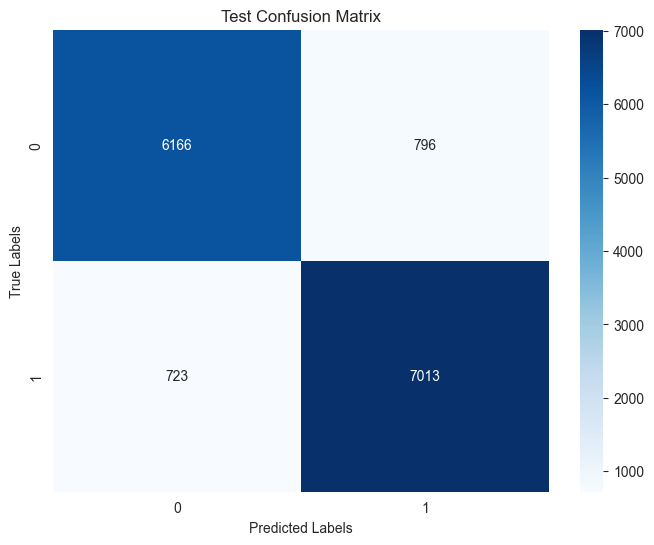

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
final_df = pd.read_excel("final_data.xlsx")

# Extract features and target
X = final_df.drop(['result'], axis=1)
y = final_df['result']

# Replace inf and negative values in 'cur_run_rate' with zeros
X['cur_run_rate'] = X['cur_run_rate'].apply(lambda x: 0 if x <= 0 or np.isinf(x) else x)

# Encode categorical variables
label_encoders = {}
categorical_columns = ['Batting_team', 'Bowling_team', 'city']

for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    X[col] = label_encoders[col].fit_transform(X[col])

# Split the data into training (70%), validation (15%), and testing (15%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=45)
X_validate, X_test, y_validate, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=45)

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [100],
    'max_depth': [10],
    'min_samples_split': [2],
    'min_samples_leaf': [2]
}

# Create and train the RandomForestClassifier with GridSearchCV
clf = RandomForestClassifier(random_state=45)
grid_search = GridSearchCV(clf, param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Make predictions on the validation set using the best model
best_clf = grid_search.best_estimator_
validate_pred = best_clf.predict(X_validate)

# Calculate and print the validation accuracy
accuracy_validate = accuracy_score(y_validate, validate_pred)
print("Validation Accuracy:", accuracy_validate)

# Print a classification report for more detailed performance metrics
print("Validation Classification Report:")
print(classification_report(y_validate, validate_pred))

# Get the confusion matrix for the validation set
confusion_matrix_validate = confusion_matrix(y_validate, validate_pred)
print("Validation Confusion Matrix:")
print(confusion_matrix_validate)

# Plot the confusion matrix as a chart
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_validate, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Validation Confusion Matrix')
plt.show()

# Make predictions on the test set using the best model
test_pred = best_clf.predict(X_test)

# Calculate and print the test accuracy
accuracy_test = accuracy_score(y_test, test_pred)
print("Test Accuracy:", accuracy_test)

# Print a classification report for more detailed performance metrics
print("Test Classification Report:")
print(classification_report(y_test, test_pred))

# Get the confusion matrix for the test set
confusion_matrix_test = confusion_matrix(y_test, test_pred)
print("Test Confusion Matrix:")
print(confusion_matrix_test)

# Plot the confusion matrix as a chart for the test set
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_test, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Test Confusion Matrix')
plt.show()


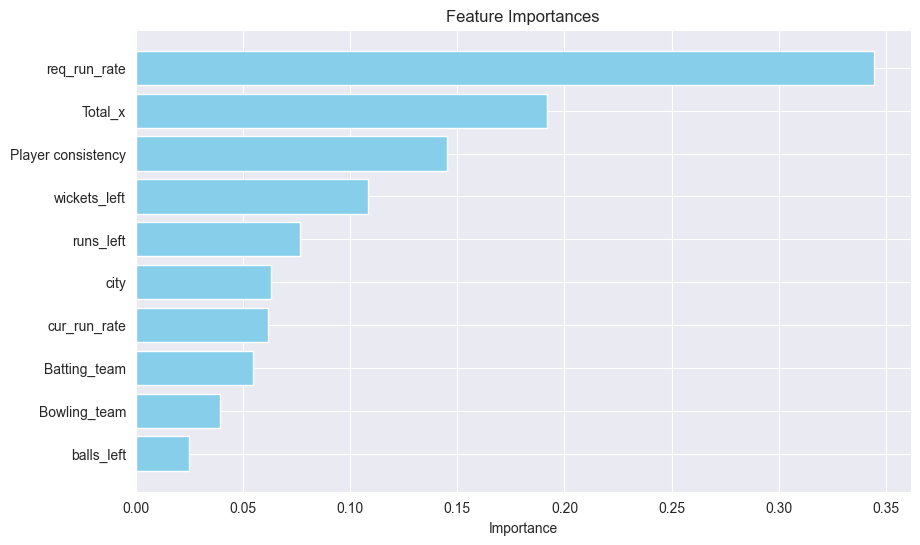

In [8]:
import matplotlib.pyplot as plt

# Define your feature names and their importances
features = [
    "req_run_rate",
    "Total_x",
    "Player consistency",
    "wickets_left",
    "runs_left",
    "city",
    "cur_run_rate",
    "Batting_team",
    "Bowling_team",
    "balls_left"
]
importance = [
    0.344303,
    0.192012,
    0.145131,
    0.108568,
    0.076771,
    0.063182,
    0.061544,
    0.054913,
    0.039509,
    0.025065
]

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(features, importance, color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # Invert the y-axis to display the most important feature at the top

# Show the plot
plt.show()


In [11]:
# Logistic Regresion

Logistic Regression Validation Accuracy: 0.7793427230046949
Logistic Regression Validation Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.74      0.77      7104
           1       0.77      0.81      0.79      7593

    accuracy                           0.78     14697
   macro avg       0.78      0.78      0.78     14697
weighted avg       0.78      0.78      0.78     14697

Validation Confusion Matrix for Logistic Regression:
[[5283 1821]
 [1422 6171]]


C:\Disc D\NMIMS\capstone\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


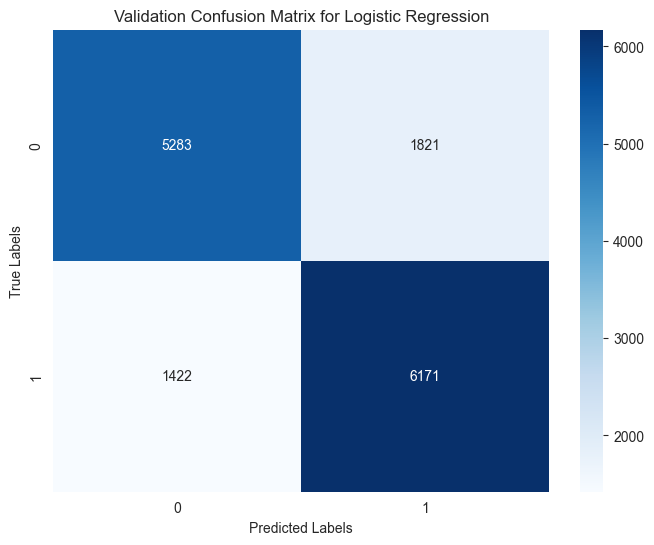

Logistic Regression Testing Accuracy: 0.772826234861886
Logistic Regression Testing Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.74      0.76      6962
           1       0.77      0.80      0.79      7736

    accuracy                           0.77     14698
   macro avg       0.77      0.77      0.77     14698
weighted avg       0.77      0.77      0.77     14698

Test Confusion Matrix for Logistic Regression:
[[5163 1799]
 [1540 6196]]


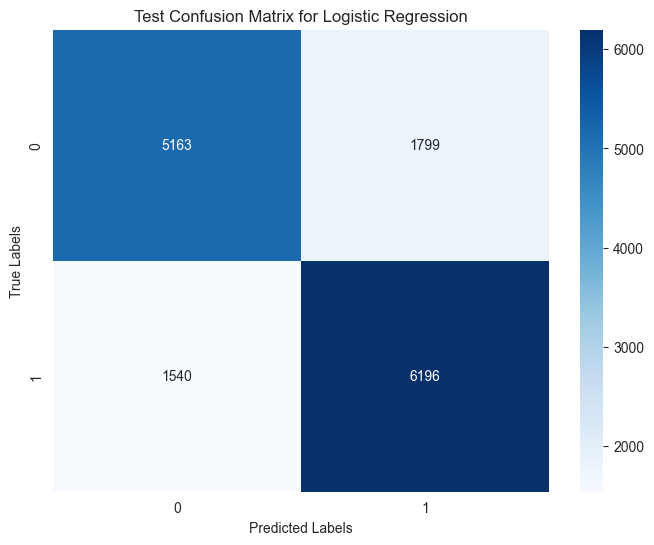

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
final_df = pd.read_excel("final_data.xlsx")

# Extract features and target
X = final_df.drop(['result'], axis=1)
y = final_df['result']

# Replace inf and negative values in 'cur_run_rate' with zeros
X['cur_run_rate'] = X['cur_run_rate'].apply(lambda x: 0 if x <= 0 or np.isinf(x) else x)

# Encode categorical variables
label_encoders = {}
categorical_columns = ['Batting_team', 'Bowling_team', 'city']

for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    X[col] = label_encoders[col].fit_transform(X[col])

# Split the data into training (70%), validation (15%), and testing (15%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=45)
X_validate, X_test, y_validate, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=45)

# Create and train the Logistic Regression model
logistic_reg = LogisticRegression(random_state=45)
logistic_reg.fit(X_train, y_train)

# Make predictions on the validation set
validate_pred_lr = logistic_reg.predict(X_validate)

# Evaluate the classifier's performance on the validation set
validate_accuracy_lr = accuracy_score(y_validate, validate_pred_lr)
print("Logistic Regression Validation Accuracy:", validate_accuracy_lr)

# Print a classification report for the validation set
print("Logistic Regression Validation Classification Report:")
print(classification_report(y_validate, validate_pred_lr))

# Get the confusion matrix for the validation set
confusion_matrix_validate_lr = confusion_matrix(y_validate, validate_pred_lr)
print("Validation Confusion Matrix for Logistic Regression:")
print(confusion_matrix_validate_lr)

# Plot the confusion matrix as a chart for the validation set
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_validate_lr, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Validation Confusion Matrix for Logistic Regression')
plt.show()

# Make predictions on the testing set
test_pred_lr = logistic_reg.predict(X_test)

# Evaluate the classifier's performance on the testing set
test_accuracy_lr = accuracy_score(y_test, test_pred_lr)
print("Logistic Regression Testing Accuracy:", test_accuracy_lr)

# Print a classification report for the testing set
print("Logistic Regression Testing Classification Report:")
print(classification_report(y_test, test_pred_lr))

# Get the confusion matrix for the test set
confusion_matrix_test_lr = confusion_matrix(y_test, test_pred_lr)
print("Test Confusion Matrix for Logistic Regression:")
print(confusion_matrix_test_lr)

# Plot the confusion matrix as a chart for the test set
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_test_lr, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Test Confusion Matrix for Logistic Regression')
plt.show()


SVM Validation Accuracy: 0.7831530244267537
SVM Validation Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.75      0.77      7104
           1       0.78      0.82      0.80      7593

    accuracy                           0.78     14697
   macro avg       0.78      0.78      0.78     14697
weighted avg       0.78      0.78      0.78     14697

Validation Confusion Matrix for SVM:
[[5309 1795]
 [1392 6201]]
SVM Testing Accuracy: 0.7777248605252415
SVM Testing Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.75      0.76      6962
           1       0.78      0.80      0.79      7736

    accuracy                           0.78     14698
   macro avg       0.78      0.78      0.78     14698
weighted avg       0.78      0.78      0.78     14698

Test Confusion Matrix for SVM:
[[5208 1754]
 [1513 6223]]


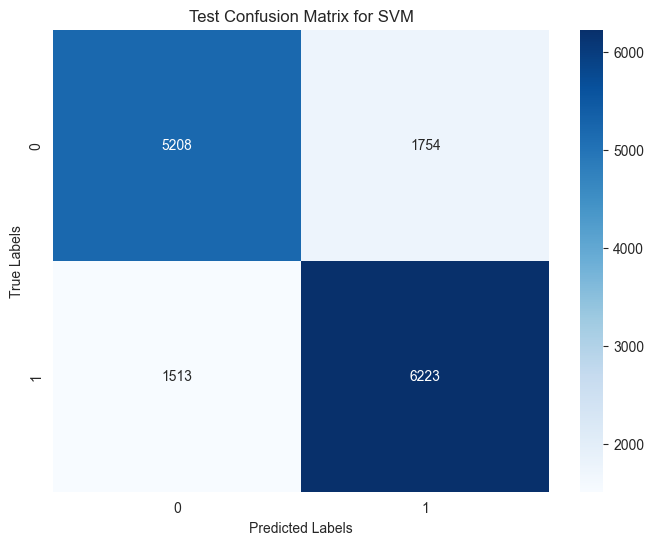

In [17]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
final_df = pd.read_excel("final_data.xlsx")

# Extract features and target
X = final_df.drop(['result'], axis=1)
y = final_df['result']

# Replace inf and negative values in 'cur_run_rate' with zeros
X['cur_run_rate'] = X['cur_run_rate'].apply(lambda x: 0 if x <= 0 or np.isinf(x) else x)

# Encode categorical variables
label_encoders = {}
categorical_columns = ['Batting_team', 'Bowling_team', 'city']

for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    X[col] = label_encoders[col].fit_transform(X[col])

# Split the data into training (70%), validation (15%), and testing (15%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=45)
X_validate, X_test, y_validate, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=45)

# Create and train the Support Vector Machine (SVM) model
svm_classifier = SVC(kernel='linear', random_state=45)
svm_classifier.fit(X_train, y_train)

# Make predictions on the validation set
validate_pred_svm = svm_classifier.predict(X_validate)

# Evaluate the classifier's performance on the validation set
validate_accuracy_svm = accuracy_score(y_validate, validate_pred_svm)
print("SVM Validation Accuracy:", validate_accuracy_svm)

# Print a classification report for the validation set
print("SVM Validation Classification Report:")
print(classification_report(y_validate, validate_pred_svm))

# Get the confusion matrix for the validation set
confusion_matrix_validate_svm = confusion_matrix(y_validate, validate_pred_svm)
print("Validation Confusion Matrix for SVM:")
print(confusion_matrix_validate_svm)

# Make predictions on the testing set
test_pred_svm = svm_classifier.predict(X_test)

# Evaluate the classifier's performance on the testing set
test_accuracy_svm = accuracy_score(y_test, test_pred_svm)
print("SVM Testing Accuracy:", test_accuracy_svm)

# Print a classification report for the testing set
print("SVM Testing Classification Report:")
print(classification_report(y_test, test_pred_svm))

# Get the confusion matrix for the test set
confusion_matrix_test_svm = confusion_matrix(y_test, test_pred_svm)
print("Test Confusion Matrix for SVM:")
print(confusion_matrix_test_svm)

# Plot the confusion matrix as a chart for the test set
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_test_svm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Test Confusion Matrix for SVM')
plt.show()


Naive Bayes Validation Accuracy: 0.7092603932775396
Naive Bayes Validation Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.47      0.61      7104
           1       0.65      0.93      0.77      7593

    accuracy                           0.71     14697
   macro avg       0.76      0.70      0.69     14697
weighted avg       0.76      0.71      0.69     14697

Naive Bayes Testing Accuracy: 0.7160838209280174
Naive Bayes Testing Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.48      0.61      6962
           1       0.66      0.93      0.78      7736

    accuracy                           0.72     14698
   macro avg       0.76      0.70      0.70     14698
weighted avg       0.76      0.72      0.70     14698

Test Confusion Matrix for Naive Bayes:
[[3331 3631]
 [ 542 7194]]


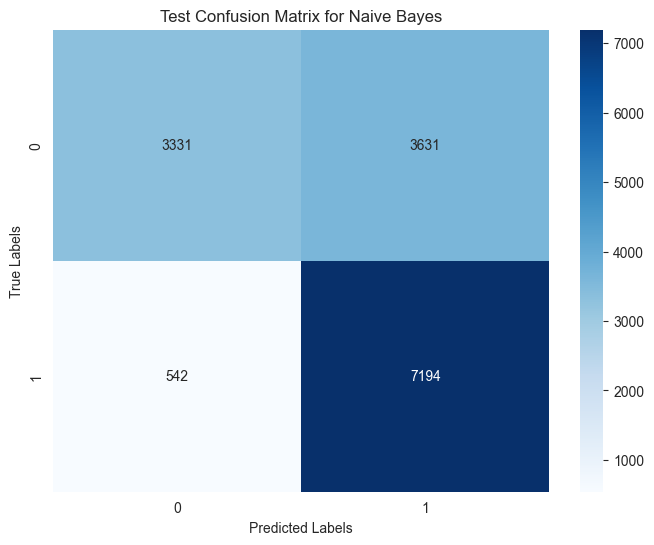

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB  # Import Gaussian Naive Bayes
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
final_df = pd.read_excel("final_data.xlsx")

# Extract features and target
X = final_df.drop(['result'], axis=1)
y = final_df['result']

# Encode categorical variables
label_encoders = {}
categorical_columns = ['Batting_team', 'Bowling_team', 'city']

for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    X[col] = label_encoders[col].fit_transform(X[col])

# Replace inf and negative values in 'cur_run_rate' with zeros
X['cur_run_rate'] = X['cur_run_rate'].apply(lambda x: 0 if x <= 0 or np.isinf(x) else x)


# Split the data into training (70%), validation (15%), and testing (15%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=45)
X_validate, X_test, y_validate, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=45)


# Create and train the Gaussian Naive Bayes model
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

# Make predictions on the validation set
validate_pred_nb = naive_bayes.predict(X_validate)

# Evaluate the classifier's performance on the validation set
validate_accuracy_nb = accuracy_score(y_validate, validate_pred_nb)
print("Naive Bayes Validation Accuracy:", validate_accuracy_nb)

# Print a classification report for the validation set
print("Naive Bayes Validation Classification Report:")
print(classification_report(y_validate, validate_pred_nb))

# Make predictions on the testing set
test_pred_nb = naive_bayes.predict(X_test)

# Evaluate the classifier's performance on the testing set
test_accuracy_nb = accuracy_score(y_test, test_pred_nb)
print("Naive Bayes Testing Accuracy:", test_accuracy_nb)

# Print a classification report for the testing set
print("Naive Bayes Testing Classification Report:")
print(classification_report(y_test, test_pred_nb))

# Get the confusion matrix for the test set
confusion_matrix_test_nb = confusion_matrix(y_test, test_pred_nb)
print("Test Confusion Matrix for Naive Bayes:")
print(confusion_matrix_test_nb)

# Plot the confusion matrix as a chart for the test set
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_test_nb, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Test Confusion Matrix for Naive Bayes')
plt.show()
